In [1]:
%load_ext autoreload
%aimport -numpy -cv2 -torch -matplotlib -matplotlib.pyplot
%autoreload 2
%config InlineBackend.figure_format = 'jpg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib
from panorama_to_pinhole import *

In [3]:
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Load panorama

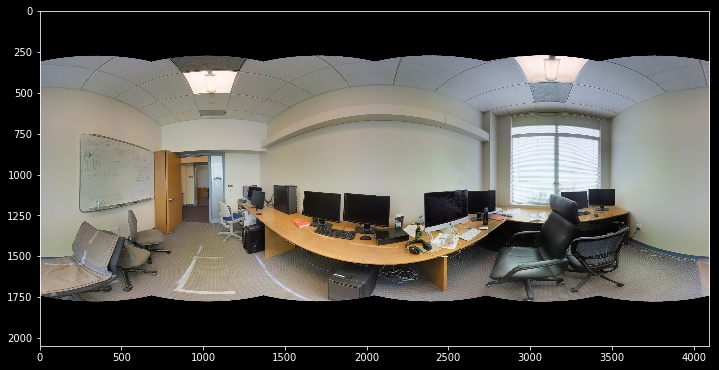

In [4]:
import imageio
panorama_img = imageio.imread('sample_panorama.jpg')[:, :, :3]
panorama_sampler = panorama_to_sampler(panorama_img)
plt.imshow(panorama_img)

## Full pipeline function

In [5]:
res = (640, 480)
focal = 400

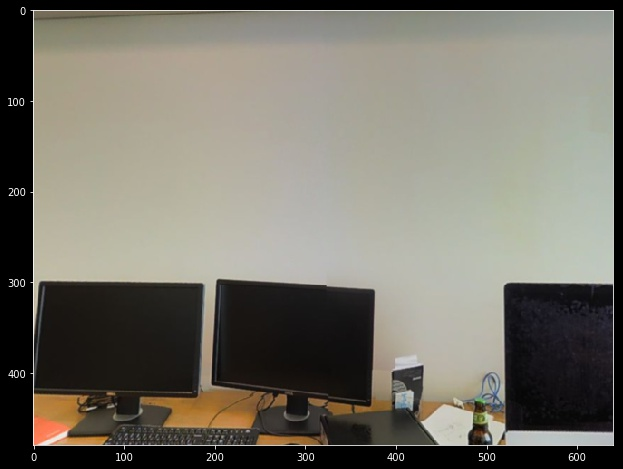

In [6]:
plt.imshow(panorama_to_pinhole(panorama_sampler, res, focal, [0, 0, 0]))

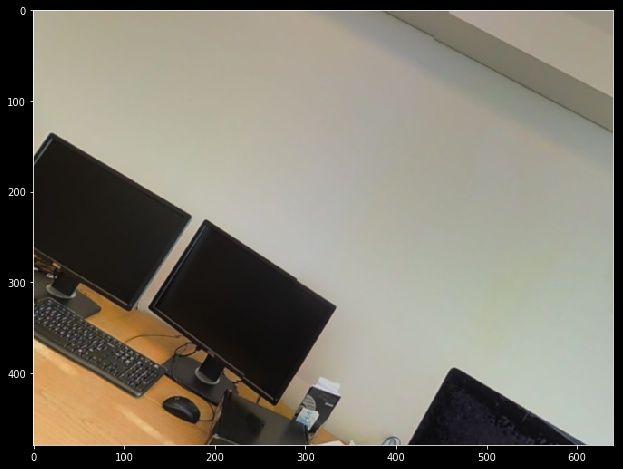

In [7]:
plt.imshow(panorama_to_pinhole(panorama_sampler, res, focal, [0, 0, 30]))

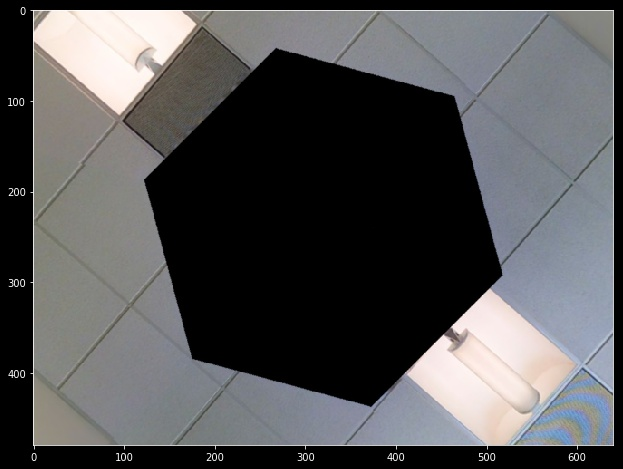

In [8]:
plt.imshow(panorama_to_pinhole(panorama_sampler, res, focal, [90, 45, 0]))

## Steps

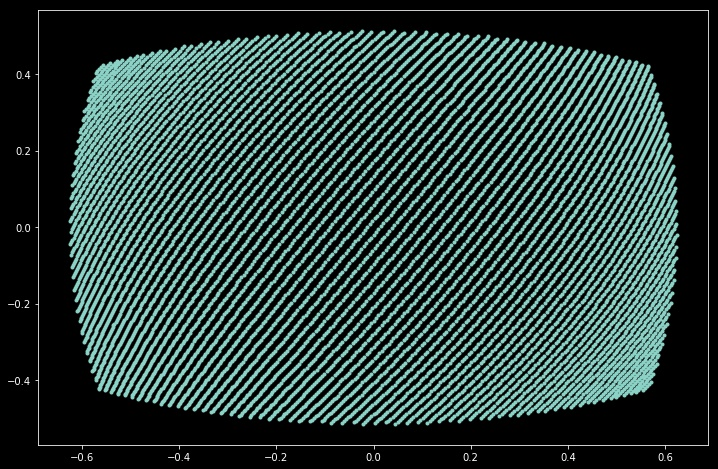

In [9]:
def display_pts(pts, interval=31):
	plt.figure()
	plt.scatter(pts[::interval, 0], pts[::interval, 1], marker='.')
	
img_res = (640, 480)
focal = 400

unit_vs = make_img_unit_vectors(img_res, focal)
display_pts(unit_vs)

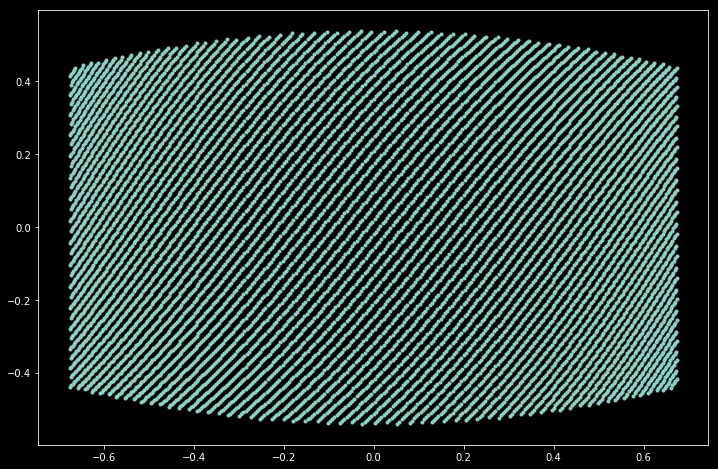

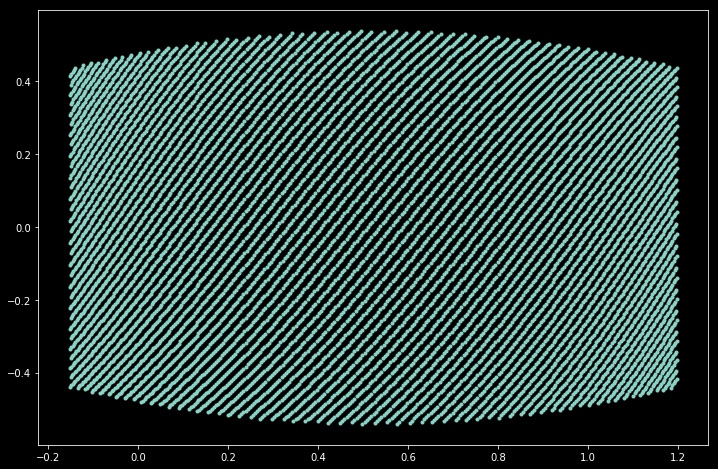

In [10]:
mat_R_id = R_cam_to_world(0, 0, 0)
mat_R_up30 = R_cam_to_world(0, np.deg2rad(30), 0)

sph_1 = unit_vectors_to_spherical(unit_vs @ mat_R_id.T)
sph_up30 = unit_vectors_to_spherical(unit_vs @ mat_R_up30.T)

display_pts(sph_1)
display_pts(sph_up30)
# mat_R_id, mat_R_up30

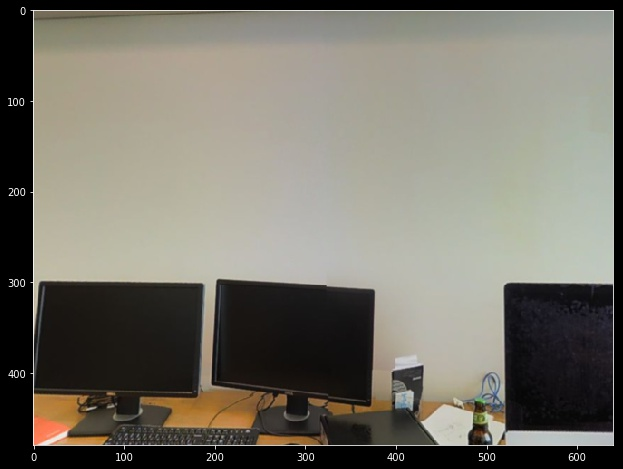

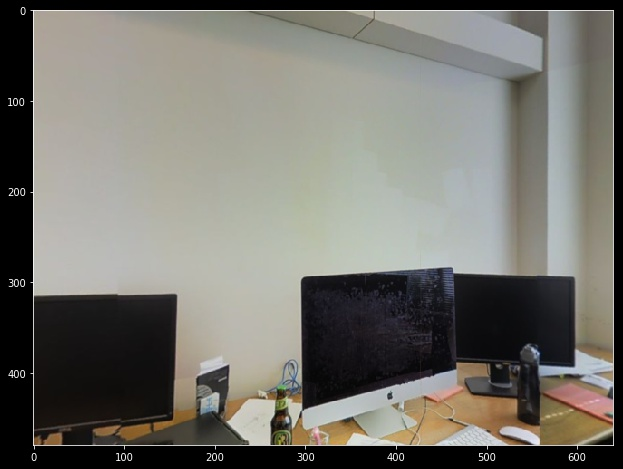

In [11]:
def sample_spherical(sampler, sph_pts, img_w_h):
	colors = sampler(sph_pts[:, ::-1])
	colors = np.rint(colors).astype(np.uint8)
	img = colors.reshape( img_w_h[::-1] + (3,) )
	return img

plt.figure()
plt.imshow(sample_spherical(panorama_sampler, sph_1, img_res))
plt.figure()
plt.imshow(sample_spherical(panorama_sampler, sph_up30, img_res))